In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import raytrace as rt
import numpy as np
import math
from pylab import *
from raytrace import implane
import rtcore

In [25]:
freq_hz = 200.e6 # Hz, radio wave frequency
grid=(100,100)
rect=(-2, -2, 2, 2)
obs=(215, 0, 0)  # Position of the observer (the earth's coordinates) in SGI system
rsph = 10  # Radius of the integrarion sphere
niter = 1500  #The maximum iterations to perform using the algorithm

In [26]:
test1 = rt.implane(grid,
                   rect,
                   obs,
                   rsph,
                   freq=freq_hz,
                   mode='TbrIQUV',
                   trkparms=['pos'],
                   trknpmax=1500)

test1.package = '/home/hp/raytrace/py_raytr_threaded'

plf_cname =  plasma_parameters.c
fname =  plasma_parameters.c
dname =  /home/hp/raytrace_work/raytrace_scripts
bfname =  plasma_parameters.c
name =  plasma_parameters
gcc -g -fPIC  -I/home/hp/miniconda3/envs/py27/lib/python2.7/site-packages/raytrace/inc -c /home/hp/raytrace_work/raytrace_scripts/streamer.c -o streamer.o
gcc -g -fPIC  -I/home/hp/miniconda3/envs/py27/lib/python2.7/site-packages/raytrace/inc -c plasma_parameters.c -o plasma_parameters.o
gcc -shared streamer.o plasma_parameters.o -L/home/hp/miniconda3/envs/py27/lib/python2.7/site-packages/raytrace/lib -L/usr/lib -lm -lmxv -o plasma_parameters.so


In [27]:
# grid size
grid = (100, 100)

nx = int(grid[0])
ny = int(grid[1])

# number of rays you want
nrays = 10

# choose one x-location from where rays start
# usually edge of plane or middle; here I keep middle in x
ix = nx // 2

# spacing along y direction
stepy = ny // nrays

# build tracker rays (only 10 rays)
trkrays = []

for j in range(0, ny, stepy):
    if len(trkrays) < nrays:
        trkrays.append([ix, j])

print(trkrays)

[[50, 0], [50, 10], [50, 20], [50, 30], [50, 40], [50, 50], [50, 60], [50, 70], [50, 80], [50, 90]]


In [28]:
test1.trace(niter, trkrays)
traj = test1.traj.pos

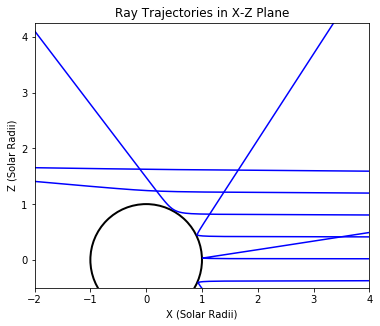

In [30]:
# ---------------------------------------------------
# X-Z PLANE VIEW WITH SUN AT ORIGIN
# traj shape = (Nrays, Nsteps, 3)
# traj[:,:,0] = X , traj[:,:,1] = Y , traj[:,:,2] = Z
# ---------------------------------------------------
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

# -----------------------------
# Draw Sun (radius = 1 Rs)
# -----------------------------
sun = plt.Circle((0.0, 0.0), 1.0, fill=False, linewidth=2)
ax.add_patch(sun)

# -----------------------------
# Plot ray trajectories (same color)
# -----------------------------
for i in range(traj.shape[0]):
    ax.plot(traj[i,:,0],   # X
            traj[i,:,2],   # Z
            linewidth=1.5,
            color='blue')

# -----------------------------
# Axis settings
# -----------------------------
ax.set_xlabel('X (Solar Radii)')
ax.set_ylabel('Z (Solar Radii)')
ax.set_title('Ray Trajectories in X-Z Plane')

ax.set_aspect('equal')

# Make sure Sun spans -1 to +1 clearly
ax.set_xlim(-2,4)
ax.set_ylim(-0.5,4.25)

plt.show()
